In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [76]:
shp = (25,25)
img = np.floor(np.random.random(shp) + 0.5)

In [77]:
def four_way(out, i, j, color, label):
    
    if i < 0 or i>= shp[0]:
        return
    if j < 0 or j >= shp[1]:
        return 
    if vis[i][j] or img[i][j] ==0:
        return
    
    vis[i][j] = True
    out[i][j] = color
    labels[i][j] = label
    four_way(out, i - 1, j, color,label)
    four_way(out, i + 1, j, color,label)
    four_way(out, i, j - 1, color,label)
    four_way(out, i, j + 1, color,label)

In [87]:
def eight_way(out, i, j, color,label):
    if i < 0 or i >= shp[0]: 
        return
    if j < 0 or j >= shp[1]:
        return
    if vis[i][j] or img[i][j] == 0: 
        return
    
    vis[i][j] = True 
    out[i][j] = color
    labels[i][j] = label
    
    eight_way(out, i - 1, j, color,label)
    eight_way(out, i + 1, j, color,label)
    eight_way(out, i, j - 1, color,label)
    eight_way(out, i, j + 1, color,label)
    eight_way(out, i - 1, j - 1, color,label)
    eight_way(out, i - 1, j + 1, color,label)
    eight_way(out, i + 1, j - 1, color,label)
    eight_way(out, i + 1, j + 1, color,label)

In [88]:
def m_way(out, i, j, color,label):
    if i<0 or i>= shp[0]:
        return
    if j<0 or j>= shp[1]:
        return
    if vis[i][j] or img[i][j] == 0:
        return
    
    vis[i][j] = True
    out[i][j] = color
    labels[i][j] = label
    
    m_way(out, i - 1, j, color,label)
    m_way(out, i + 1, j, color,label)
    m_way(out, i, j - 1, color,label)
    m_way(out, i, j + 1, color,label)
    m_way(out, i - 1, j - 1, color,label)
    m_way(out, i - 1, j + 1, color,label)
    m_way(out, i + 1, j - 1, color,label)
    m_way(out, i + 1, j + 1, color,label)

In [89]:
def plot(out):
    fig, ax = plt.subplots(figsize=(20,10))

    ax.imshow(out)
    for i in range(shp[0]):
        for j in range(shp[1]):
            c = labels[j,i]
            ax.text(i, j, str(c), va='center', ha='center')

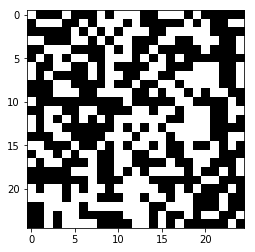

In [81]:
fig = plt.figure(100)
fig.canvas.set_window_title('Main')
plt.imshow(img, cmap="Greys")

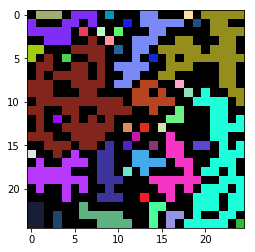

In [82]:
vis = np.zeros(shp,dtype=bool)
out = np.zeros(shp + (3, ), dtype=int) 
labels = np.zeros(shp,dtype=int)
label=1
for i in range(shp[0]):
    for j in range(shp[1]): 
        if vis[i][j] or img[i][j]==0:
            continue
        
        color = np.random.randint(0, 255, 3)
        four_way(out, i, j, color,label)
        label+=1
        
fig = plt.figure(200)
fig.canvas.set_window_title('4-Way')
plt.imshow(out)

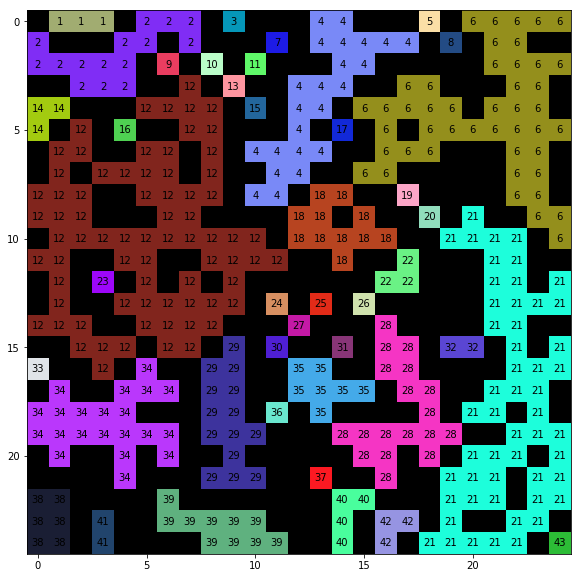

In [83]:
plot(out)

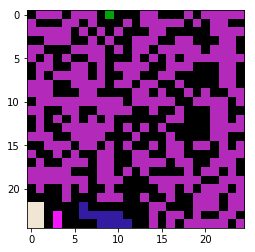

In [91]:
vis = np.zeros(shp, dtype=bool)
out = np.zeros(shp + (3, ), dtype=int)
label=1
for i in range(shp[0]):
    for j in range(shp[1]):
        
        if vis[i][j] or img[i][j]==0:
            continue
        color = np.random.randint(0,255,3)
        eight_way(out, i, j, color,label)
        label+=1
        
fig = plt.figure(300)
fig.canvas.set_window_title('8-Way')
plt.imshow(out)

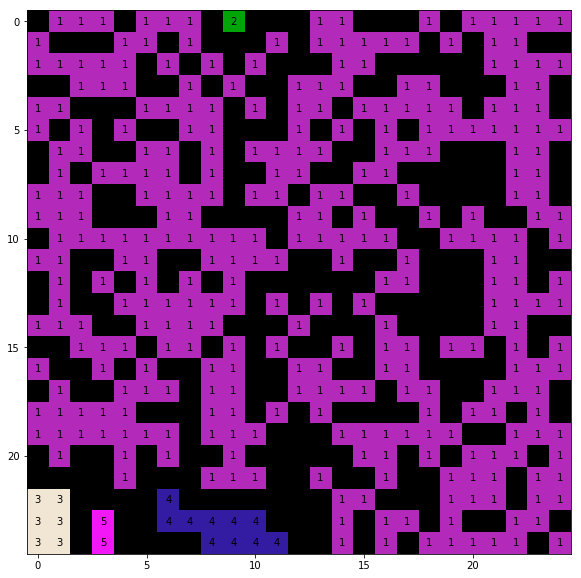

In [92]:
plot(out)

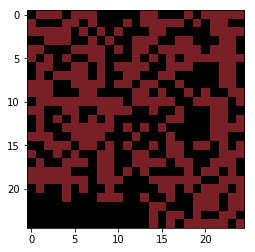

In [94]:
vis = np.zeros(shp, dtype=bool)
out = np.zeros(shp + (3, ), dtype=int) 
label=1
for i in range(shp[0]):
    for j in range(shp[1]): 
        if vis[i][j] or img[i][j]==0:
            continue
            
    color = np.random.randint(0, 255, 3)
    m_way(out, i, j, color,label)
    label+=1
    
fig = plt.figure(400)
fig.canvas.set_window_title('m-Way')
plt.imshow(out)
plt.show()

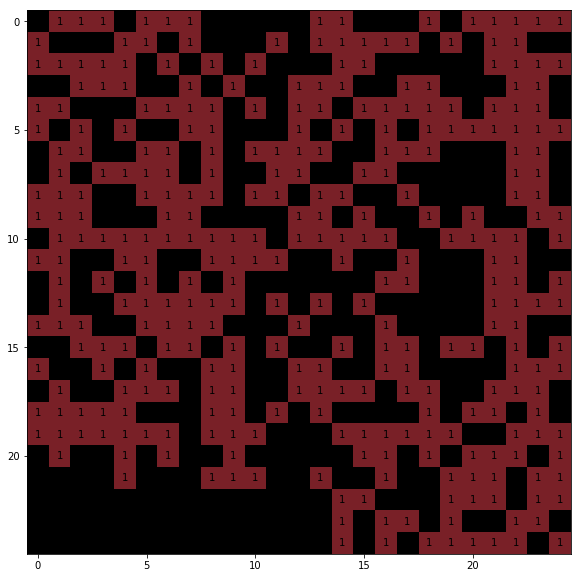

In [95]:
plot(out)